#  Classifying Subscriber Likelihood in a Minecraft Research Server:  
## A Comparison of Demographic and Behavioral Predictors
---
# 1. Introduction

In the age of data-driven research, real-world projects provide an exciting opportunity to apply statistical methods to practical problems. This project, in collaboration with a research group led by Professor Frank Wood from the Department of Computer Science at the University of British Columbia, investigates player behavior in a video game setting. The group has deployed a Minecraft server to collect gameplay data, recording player activity as they explore and interact with the virtual world. However, maintaining this server-based study requires careful planning — including targeting the right kinds of players for recruitment and ensuring adequate computational resources like licenses and hardware. To support these efforts, one important question arises: **what kinds of players are most likely to subscribe to a game-related newsletter, indicating long-term interest and engagement with the project?**

## 1.1 Research Question

**Which player characteristics — demographic or behavioral — are most predictive of newsletter subscription in a game research environment?**

We aim to explore whether features like age and gender (demographics) or variables such as hours played and experience level (game behavior) better predict a player’s likelihood of subscribing. By doing so, we hope to provide insights that will help the research team optimize recruitment and outreach strategies.

## 1.2 Dataset Overview

The dataset consists of 196 observations and 7 variables, each representing a unique player. The main response variable is:

- `subscribe`: Whether or not the player subscribed to the newsletter (`TRUE` / `FALSE`)

Key explanatory variables used in this analysis are:

- `experience`: Player’s self-reported gaming experience level (e.g., *Beginner, Amateur, Veteran, Pro*)
- `played_hours`: Total hours played on the Minecraft server (numeric)
- `gender`: Player’s gender (e.g., *Male, Female, Non-binary*)
- `Age`: Player’s age in years (numeric)

Other variables such as `hashedEmail` and `name` are excluded from modeling due to privacy concerns or irrelevance for prediction. 

**Important preprocessing considerations include:**
- Encoding categorical variables such as `experience` and `gender`
- Standardizing continuous variables like `Age` and `played_hours`
- Addressing potential class imbalance in the `subscribe` variable

This setup provides a strong foundation for building classification models that can reveal whether demographic or behavioral features are more effective predictors of player subscription behavior.



# 2. Methods and Results

## 2.0 Method Overview

To investigate which player characteristics are most predictive of newsletter subscription, we conducted a supervised classification analysis using the k-nearest neighbors (KNN) algorithm. The primary response variable was `subscribe`, a categorical variable indicating whether a player subscribed to the newsletter (`TRUE` or `FALSE`). Our explanatory variables included both demographic and behavioral features: `age` and `gender` (demographic), and `experience` and `played_hours` (behavioral).

We began by loading and exploring the dataset to understand its structure and check for missing values or inconsistencies. Categorical variables (`gender` and `experience`) were converted to numerical format using one-hot encoding, while continuous variables (`age` and `played_hours`) were standardized to ensure that all predictors contributed equally in the KNN distance calculations.

To evaluate model performance, we split the dataset into a training set (75%) and a testing set (25%). We used 10-fold cross-validation on the training set to tune the number of neighbors (K) for the KNN classifier, selecting the value of K that minimized classification error. The final model was trained using this optimal K, and predictions were made on the test set.

To compare the predictive strength of different types of features, we built and evaluated three models:
1. A model using only demographic features (`age` and `gender`)
2. A model using only behavioral features (`experience` and `played_hours`)
3. A model using all four features combined

For each model, we calculated key classification metrics on the test set — including accuracy, precision, recall, and F1 score — to determine which feature group provided the most reliable prediction of newsletter subscription.


## 2.1 Loading Libraries
Libraries used for this project include
- **repr**: Allows customization of output size in Jupyter notebooks, especially useful for adjusting the resolution and dimensions of plots to improve readability.
- **tidyverse**: A collection of essential R packages for data science that simplifies data import, cleaning, manipulation, and visualization. It includes core tools like `dplyr`, `ggplot2`, and `readr`.
- **tidymodels**: A unified framework for building, tuning, and evaluating machine learning models in a tidy and consistent way. It integrates preprocessing, model training, and performance evaluation into a streamlined workflow.

In [1]:
# Load core data science tools
library(repr)
library(tidyverse)
library(tidymodels) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 2.2 Loading Data
We begin our analysis by loading the dataset using the `read_csv()` function from the `readr` package, which is part of the `tidyverse`. Since the file is a **CSV (comma-separated values)** file, `read_csv()` is the appropriate function for reading in structured tabular data.

We use a **relative file path** (`"data/players.csv"`) to ensure the notebook remains portable — that is, anyone with the same folder structure can run the code successfully, regardless of their working directory.

The dataset, `players.csv` in the `data` folder, is already clean and properly formatted:
- The **first row contains headers**
- There is **no need to skip rows**
- All columns are read in automatically

The data is read into R as a **tibble**, named as `players` making it easy to view, filter, and manipulate as we continue with our analysis.

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


## 2.3 Data Cleaning and Modification

### 2.3.1 NA Removal

To ensure accurate analysis and model performance, we removed rows containing missing values using the `drop_na()` function from the `tidyverse`. This step helps prevent errors or misleading results that can occur if `NA` values are passed into modeling functions or summary statistics.


In [3]:
players_clean <- players |> 
  drop_na()
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


### 2.3.2 Variable Selection
We selected a subset of relevant variables to focus our analysis on player characteristics and behaviors that may predict subscription status. The selected columns include:
- `subscribe`: the response variable
- `gender`, `Age`: demographic characteristics
- `played_hours`, `experience`: behavioral indicators of engagement

Removing unrelated columns (like IDs or metadata) helps simplify the model and reduces noise.

In [4]:
players_model <- players_clean |>
  select(subscribe, gender, Age, experience, played_hours)
players_model

subscribe,gender,Age,experience,played_hours
<lgl>,<chr>,<dbl>,<chr>,<dbl>
TRUE,Male,9,Pro,30.3
TRUE,Male,17,Veteran,3.8
FALSE,Male,17,Veteran,0.0
TRUE,Female,21,Amateur,0.7
TRUE,Male,21,Regular,0.1
TRUE,Female,17,Amateur,0.0
TRUE,Female,19,Regular,0.0
FALSE,Male,21,Amateur,0.0
TRUE,Male,17,Amateur,0.1


### 2.3.3 Converting Response Variable to Factor
Since we are performing a classification task, we converted the `subscribe` column — our response variable — into a **factor**. This allows our modeling functions to treat the task correctly as classification. The original column was overwritten directly to maintain clarity and consistency in our dataset.

In [5]:
players_model <- players_model |>
  mutate(subscribe = as_factor(subscribe))

players_demo_model <- players_model|>
select (subscribe, gender, Age)
players_demo_model

players_behavior_model <- players_model|>
select (subscribe, experience, played_hours)
players_behavior_model

subscribe,gender,Age
<fct>,<chr>,<dbl>
TRUE,Male,9
TRUE,Male,17
FALSE,Male,17
TRUE,Female,21
TRUE,Male,21
TRUE,Female,17
TRUE,Female,19
FALSE,Male,21
TRUE,Male,17


subscribe,experience,played_hours
<fct>,<chr>,<dbl>
TRUE,Pro,30.3
TRUE,Veteran,3.8
FALSE,Veteran,0.0
TRUE,Amateur,0.7
TRUE,Regular,0.1
TRUE,Amateur,0.0
TRUE,Regular,0.0
FALSE,Amateur,0.0
TRUE,Amateur,0.1


### 2.4 Data Splitting

To evaluate the performance of our classification model fairly, we split the dataset into two parts:

- **Training set (75%)**: Used to fit and tune the model.
- **Testing set (25%)**: Held out and used only at the end to assess how well the model performs on unseen data.

This separation is essential for preventing **overfitting** — when a model performs well on training data but poorly on new, unseen data. By evaluating on a test set that the model has never seen, we get a more honest estimate of how it will perform in real-world scenarios.

We also used `strata = subscribe` to ensure that the proportion of players who subscribed vs. didn’t subscribe remains consistent across both the training and testing sets.


In [14]:
set.seed(1234)  # for reproducibility

players_demo_split <- initial_split(players_demo_model, prop = 0.75, strata = subscribe)
players_demo_training <- training(players_demo_split)
players_demo_testing  <- testing(players_demo_split)

players_behavior_split <- initial_split(players_behavior_model, prop = 0.75, strata = subscribe)
players_behavior_training <- training(players_behavior_split)
players_behavior_testing  <- testing(players_behavior_split)


### 2.5 Creating Separate Recipes for Comparison

To understand which group of features is more predictive of newsletter subscription, we created separate modeling pipelines for:

- **Demographic predictors**: `gender`, `Age`
- **Behavioral predictors**: `experience`, `played_hours`

Each recipe applies the same preprocessing steps:
- Dummy encoding of categorical variables
- Normalization of numeric predictors

This setup allows us to fairly compare models trained on different feature groups and determine which type of information is more useful for predicting subscription.

In [15]:
# Demographic-only recipe
recipe_demo <- recipe(subscribe ~ gender + Age, data = players_demo_training ) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |> 
  step_normalize(all_numeric_predictors())
recipe_demo
# Behavioural-only recipe
recipe_behavior <- recipe(subscribe ~ experience + played_hours, data = players_behavior_training ) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |> 
  step_normalize(all_numeric_predictors())
recipe_behavior



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Novel factor level assignment for: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Novel factor level assignment for: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



###  2.6 KNN Model Specification

We defined a K-Nearest Neighbors (KNN) classification model using `nearest_neighbor()`. The number of neighbors (`k`) is left as a **tunable parameter**, which we will select using cross-validation. We chose KNN because it is simple, interpretable, and sensitive to variable scale — which makes preprocessing (normalization) important.


In [16]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = tune()) |>
  set_engine("kknn")|>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### 2.7 Cross-Validation

Using a **5-fold cross-validation** on the training data (`players_training`) to tune the number of neighbours `k` helps ensure our results are stable and generalizable by evaluating model performance on multiple train/test splits within the training set.


### 2.8 Building Workflows

To streamline model training and evaluation, we created two separate workflows using the `workflow()` function from the `workflows` package. Each workflow combines a preprocessing recipe with the KNN model specification:

- `workflow_demo`: includes the demographic recipe (gender and age)
- `workflow_behavior`: includes the behavioral recipe (experience and hours played)

This modular approach allows us to tune and evaluate models for each predictor group independently while maintaining consistent model structure and evaluation procedures.

In [17]:
# Workflow using demographic predictors
demo_fit <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(recipe_demo)|>
fit(data=players_demo_training)
demo_fit
# Workflow using behavioral predictors
behavior_fit <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(recipe_behavior)|>
fit(data=players_behavior_training)
behavior_fit

Warning message:
“tune samples were requested but there were 145 rows in the data. 140 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 140

Warning message:
“tune samples were requested but there were 145 rows in the data. 140 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 140

In [18]:
demo_subscribe_predictions <- predict (demo_fit, players_demo_testing)|>
    bind_cols(players_demo_testing)

demo_subscribe_predictions

bahavior_subscribe_predictions <- predict (behavior_fit, players_behavior_testing)|>
    bind_cols (players_behavior_testing)

bahavior_subscribe_predictions

.pred_class,subscribe,gender,Age
<fct>,<fct>,<chr>,<dbl>
TRUE,TRUE,Male,9
TRUE,FALSE,Male,17
TRUE,TRUE,Male,21
TRUE,TRUE,Female,17
TRUE,TRUE,Male,22
TRUE,TRUE,Non-binary,17
TRUE,TRUE,Male,8
TRUE,FALSE,Prefer not to say,33
TRUE,TRUE,Male,17


.pred_class,subscribe,experience,played_hours
<fct>,<fct>,<chr>,<dbl>
TRUE,TRUE,Pro,30.3
TRUE,FALSE,Veteran,0.0
TRUE,TRUE,Veteran,0.0
TRUE,TRUE,Veteran,1.6
TRUE,TRUE,Amateur,0.5
TRUE,TRUE,Regular,0.3
TRUE,TRUE,Beginner,1.0
TRUE,TRUE,Veteran,0.1
TRUE,TRUE,Beginner,0.4


In [19]:
demo_subscribe_predictions |>
metrics (truth = subscribe, estimate = .pred_class)|>
filter (.metric =="accuracy")

bahavior_subscribe_predictions |>
metrics (truth = subscribe, estimate = .pred_class)|>
filter (.metric =="accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [23]:
demo_subscribe_predictions |>
pull (subscribe) |>
levels()

bahavior_subscribe_predictions|>
pull (subscribe) |>
levels()

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

In [25]:
demo_subscribe_predictions |>
recall(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


In [28]:
players_demo_vfold <- vfold_cv(players_demo_training, v=10, strata=subscribe)

players_behavior_vfold <- vfold_cv(players_behavior_training, v=10, strata=subscribe)

In [29]:
knn_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune()) |>
            set_engine ("kknn")|>
            set_mode ("classification")


In [35]:
k_vals <- tibble(neighbors = seq(1, 100, by = 5))

knn_demo_accuracy_results <- workflow()|>
    add_recipe (recipe_demo)|>
    add_model (knn_spec)|>
    tune_grid (resamples = players_demo_vfold, grid=k_vals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
knn_demo_accuracy_results
    

knn_behavior_accuracy_results <- workflow()|>
    add_recipe (recipe_behavior)|>
    add_model (knn_spec)|>
    tune_grid (resamples = players_behavior_vfold, grid=k_vals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
knn_behavior_accuracy_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3359341,10,0.043602925,Preprocessor1_Model01
6,accuracy,binary,0.5381319,10,0.043342360,Preprocessor1_Model02
11,accuracy,binary,0.6539194,10,0.043886283,Preprocessor1_Model03
16,accuracy,binary,0.7583516,10,0.015173469,Preprocessor1_Model04
21,accuracy,binary,0.7516850,10,0.010686998,Preprocessor1_Model05
26,accuracy,binary,0.7450183,10,0.009331589,Preprocessor1_Model06
31,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model07
36,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model08
41,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5217216,10,0.039161149,Preprocessor1_Model01
6,accuracy,binary,0.4889377,10,0.031161941,Preprocessor1_Model02
11,accuracy,binary,0.6671795,10,0.034172123,Preprocessor1_Model03
16,accuracy,binary,0.6805128,10,0.033859436,Preprocessor1_Model04
21,accuracy,binary,0.6897070,10,0.017358193,Preprocessor1_Model05
26,accuracy,binary,0.7178755,10,0.014049666,Preprocessor1_Model06
31,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model07
36,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model08
41,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model09


In [39]:
demo_best_k <- knn_demo_accuracy_results|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)
demo_best_k

behavior_best_k <- knn_behavior_accuracy_results|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)
behavior_best_k

[1] 16

[1] 31

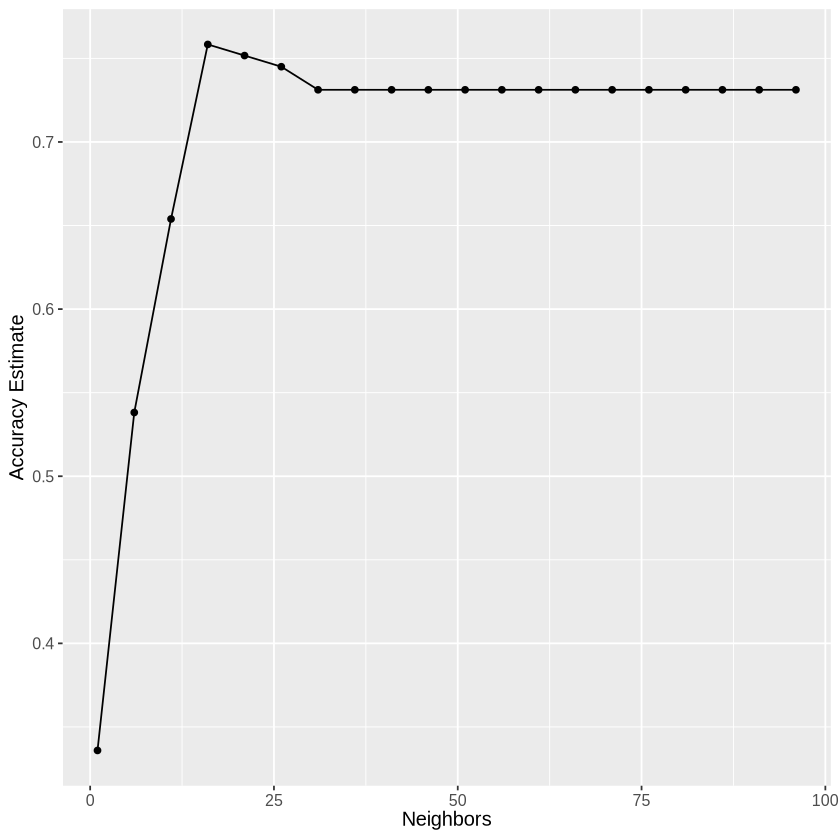

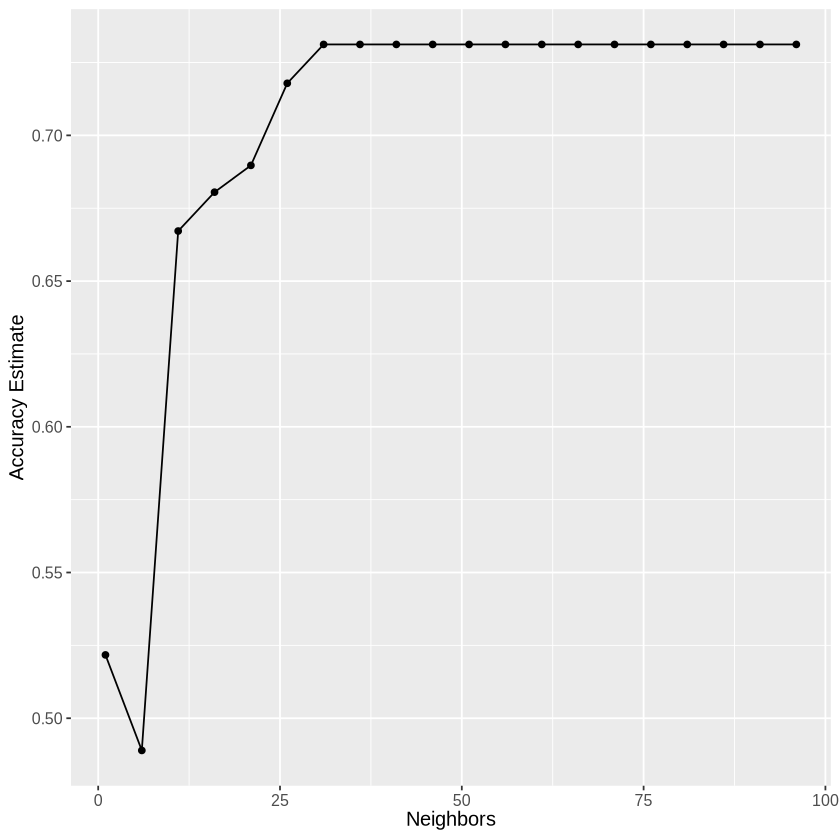

In [37]:
demo_accuracy_vs_k <- ggplot (knn_demo_accuracy_results, aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Neighbors", y="Accuracy Estimate")+
theme(text = element_text(size=12))
demo_accuracy_vs_k

behavior_accuracy_vs_k <- ggplot (knn_behavior_accuracy_results, aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Neighbors", y="Accuracy Estimate")+
theme(text = element_text(size=12))
behavior_accuracy_vs_k

In [42]:
#test set Eva

knn_demo_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = demo_best_k) |>
    set_engine("kknn")|>
    set_mode("classification")

knn_demo_fit <- workflow() |>
    add_recipe(recipe_demo) |>
    add_model (knn_demo_spec) |>
    fit(data = players_demo_training)

knn_demo_fit

knn_behavior_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = behavior_best_k) |>
    set_engine("kknn")|>
    set_mode("classification")

knn_behavior_fit <- workflow() |>
    add_recipe(recipe_behavior) |>
    add_model (knn_behavior_spec) |>
    fit(data = players_behavior_training)

knn_behavior_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2551724
Best kernel: rectangular
Best k: 16

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(31,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 31

In [45]:
players_demo_final_accuracy_predictions <- predict(knn_demo_fit, players_demo_testing) |>
    bind_cols(players_demo_testing)|>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
players_demo_final_accuracy_predictions

players_behavior_final_accuracy_predictions <- predict(knn_behavior_fit, players_behavior_testing) |>
    bind_cols(players_behavior_testing)|>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
players_behavior_final_accuracy_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7755102


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [51]:
# Make sure your prediction tibble has both truth and prediction
players_demo_predictions <- predict(knn_demo_fit, players_demo_testing) |>
  bind_cols(players_demo_testing)

players_behavior_predictions <- predict(knn_behavior_fit, players_behavior_testing) |>
  bind_cols(players_behavior_testing)

# Calculate precision and recall for demo-based model
precision(players_demo_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")
recall(players_demo_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")

# Calculate precision and recall for behavior-based model
precision(players_behavior_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")
recall(players_behavior_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3076923


Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 13 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,NA


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


### 2.9 Tuning the KNN Models

We used `tune_grid()` to tune the number of neighbors (`k`) for each KNN model using 5-fold cross-validation. We tuned both workflows (`workflow_demo` and `workflow_behavior`) over a grid of odd `k` values from 1 to 15.

To evaluate performance, we used three key classification metrics:
- **Accuracy**: overall correctness
- **Precision**: how often predicted "yes" is actually "yes"
- **Recall**: how many actual "yes" were correctly predicted

In [26]:
k_vals <- tibble(neighbors = seq(1, 100, by = 5))

# Tune demographic model


# Tune the behavioural model
tune_results_behavior <- tune_grid(
  workflow_behavior,
  resamples = players_folds,
  grid = k_vals,
  metrics = metric_set(accuracy, precision, recall))
collect_metrics(tune_results_demo)

ERROR: Error in eval(expr, envir, enclos): object 'players_folds' not found


In [76]:
set.seed(123)  # For reproducibility

# Create 5-fold cross-validation object
folds <- vfold_cv(players_training, v = 5)

# Create a grid of k values to tune over
knn_grid <- tibble(neighbors = seq(1, 20))
knn_grid 

# Load metric functions we want to use
demo_metrics <- metric_set(accuracy, precision, recall)

# Run tuning
demo_results <- tune_grid(
  workflow_demo,
  resamples = folds,
  grid = knn_grid,
  metrics = demo_metrics
)

neighbors
<int>
1
2
3
4
5
6
7
8
9


→ A | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 9 true event(s) actually occurred for the problematic event level,
               FALSE

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2



